In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
marketplace_df = pd.read_csv('marketplace.csv')

# 0. Предобработка

In [3]:
marketplace_df = marketplace_df.drop('Unnamed: 0',axis = 1)

In [4]:
marketplace_df.head(10)

,start_session,end_session,user_id,sex,platform,category,consultation,cons_duration,number_of_products,basket_amount
0,2024-10-01 00:15:51,2024-10-01 00:55:17,5209870,М,mobile,товары для животных,True,13,1,348
1,2024-10-01 00:27:06,2024-10-01 00:38:29,2540815,М,desktop,электроника,False,0,1,162
2,2024-10-01 00:52:36,2024-10-01 01:03:10,5305770,М,desktop,одежда и обувь,False,0,3,8188
3,2024-10-01 01:04:17,2024-10-01 01:39:10,5858087,М,mobile,одежда и обувь,False,0,5,11640
4,2024-10-01 01:08:44,2024-10-01 01:21:21,5711053,Ж,mobile,одежда и обувь,False,0,1,2438
5,2024-10-01 01:23:00,2024-10-01 01:52:18,3046228,М,mobile,одежда и обувь,True,10,5,11364
6,2024-10-01 01:26:42,2024-10-01 01:56:58,3365488,М,desktop,все для дома,False,0,4,23301
7,2024-10-01 01:37:37,2024-10-01 02:11:07,6286723,Ж,desktop,красота и здоровье,False,0,6,2575
8,2024-10-01 01:38:22,2024-10-01 01:56:48,8145525,Ж,mobile,одежда и обувь,True,8,2,10430
9,2024-10-01 01:39:36,2024-10-01 02:14:10,8280464,Ж,desktop,одежда и обувь,True,13,4,26667


In [5]:
marketplace_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13620 entries, 0 to 13619
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   start_session       13620 non-null  object
 1   end_session         13620 non-null  object
 2   user_id             13620 non-null  int64 
 3   sex                 13620 non-null  object
 4   platform            13620 non-null  object
 5   category            13620 non-null  object
 6   consultation        13620 non-null  bool  
 7   cons_duration       13620 non-null  int64 
 8   number_of_products  13620 non-null  int64 
 9   basket_amount       13620 non-null  int64 
dtypes: bool(1), int64(4), object(5)
memory usage: 971.1+ KB


In [6]:
marketplace_df.head(10)

,start_session,end_session,user_id,sex,platform,category,consultation,cons_duration,number_of_products,basket_amount
0,2024-10-01 00:15:51,2024-10-01 00:55:17,5209870,М,mobile,товары для животных,True,13,1,348
1,2024-10-01 00:27:06,2024-10-01 00:38:29,2540815,М,desktop,электроника,False,0,1,162
2,2024-10-01 00:52:36,2024-10-01 01:03:10,5305770,М,desktop,одежда и обувь,False,0,3,8188
3,2024-10-01 01:04:17,2024-10-01 01:39:10,5858087,М,mobile,одежда и обувь,False,0,5,11640
4,2024-10-01 01:08:44,2024-10-01 01:21:21,5711053,Ж,mobile,одежда и обувь,False,0,1,2438
5,2024-10-01 01:23:00,2024-10-01 01:52:18,3046228,М,mobile,одежда и обувь,True,10,5,11364
6,2024-10-01 01:26:42,2024-10-01 01:56:58,3365488,М,desktop,все для дома,False,0,4,23301
7,2024-10-01 01:37:37,2024-10-01 02:11:07,6286723,Ж,desktop,красота и здоровье,False,0,6,2575
8,2024-10-01 01:38:22,2024-10-01 01:56:48,8145525,Ж,mobile,одежда и обувь,True,8,2,10430
9,2024-10-01 01:39:36,2024-10-01 02:14:10,8280464,Ж,desktop,одежда и обувь,True,13,4,26667


In [7]:
marketplace_df['start_session'] = pd.to_datetime(marketplace_df['start_session'])
marketplace_df['end_session'] = pd.to_datetime(marketplace_df['end_session'])
marketplace_df['sex'] = marketplace_df['sex'].astype('category')
marketplace_df['platform'] = marketplace_df['platform'].astype('category')
marketplace_df['category'] = marketplace_df['category'].astype('category')
marketplace_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13620 entries, 0 to 13619
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_session       13620 non-null  datetime64[ns]
 1   end_session         13620 non-null  datetime64[ns]
 2   user_id             13620 non-null  int64         
 3   sex                 13620 non-null  category      
 4   platform            13620 non-null  category      
 5   category            13620 non-null  category      
 6   consultation        13620 non-null  bool          
 7   cons_duration       13620 non-null  int64         
 8   number_of_products  13620 non-null  int64         
 9   basket_amount       13620 non-null  int64         
dtypes: bool(1), category(3), datetime64[ns](2), int64(4)
memory usage: 692.4 KB


# 1. Какова средняя длительность сессий?

In [8]:
marketplace_df['session_duration_seconds'] = (marketplace_df['end_session'] - marketplace_df['start_session']).dt.total_seconds()
mean_duration_seconds = marketplace_df['session_duration_seconds'].mean()
mean_duration_minutes = mean_duration_seconds / 60

print('Средняя длительность сессии в секундах =',round(mean_duration_seconds,3))
print('Средняя длительность сессии в минутах =',round(mean_duration_minutes,3))

Средняя длительность сессии в секундах = 1497.733
Средняя длительность сессии в минутах = 24.962


# 2.  Различается ли она в каждом месяце?

Извлекаем месяц и год

In [9]:
marketplace_df['month'] = marketplace_df['start_session'].dt.month
marketplace_df['year'] = marketplace_df['start_session'].dt.year

Группируем по году и месяцу, считаем среднюю длительность

In [10]:
monthly_avg_duration = marketplace_df.groupby(['year', 'month'])['session_duration_seconds'].mean().reset_index()

Переводим секунды в минуты для удобства чтения

In [11]:
monthly_avg_duration['avg_duration_minutes'] = monthly_avg_duration['session_duration_seconds'] / 60
monthly_avg_duration['avg_duration_hours'] = monthly_avg_duration['session_duration_seconds'] / 3600

In [12]:
print("Средняя длительность сессии по месяцам:")
print(monthly_avg_duration[['year', 'month', 'avg_duration_minutes', 'avg_duration_hours']].round(2))

Средняя длительность сессии по месяцам:
   year  month  avg_duration_minutes  avg_duration_hours
0  2024     10                 24.93                0.42
1  2024     11                 24.96                0.42
2  2024     12                 24.98                0.42


# 3. Различается ли она для мужчин и женщин?

In [13]:
gender_avg_duration = marketplace_df.groupby('sex',observed=False)['session_duration_seconds'].agg(['count','mean','std','median']).round(2)

In [14]:
# 3. Добавляем длительность в минутах и часы
gender_avg_duration['mean_minutes'] = gender_avg_duration['mean'] / 60
gender_avg_duration['mean_hours'] = gender_avg_duration['mean'] / 3600
print("Средняя длительность сессии по полу:")
print(gender_avg_duration[['count', 'mean', 'mean_minutes', 'mean_hours']])

Средняя длительность сессии по полу:
     count     mean  mean_minutes  mean_hours
sex                                          
Ж     6887  1494.80     24.913333    0.415222
М     6733  1500.73     25.012167    0.416869


# 4. Различается ли она для покупателей, использующих веб-сайт или мобильное приложение?

In [15]:
a = marketplace_df[['platform','start_session','end_session']]

desktop = a.loc[a['platform'] == 'desktop'].copy()
mobile = a.loc[a['platform'] == 'mobile'].copy()

desktop['session_duration_seconds'] = (desktop['end_session'] - desktop['start_session']).dt.total_seconds()
mobile['session_duration_seconds'] = (mobile['end_session'] - mobile['start_session']).dt.total_seconds()

cnt_desktop = len(desktop)
cnt_mobile = len(mobile)

b = desktop['session_duration_seconds'].mean() ; b1 = float(round(b,2))
c = mobile['session_duration_seconds'].mean() ; c1 = float(round(c,2))

print('Общее количество клиентов, использующих веб-сайт =',cnt_desktop)
print('Общее количество клиентов, использующих мобильное приложение =',cnt_mobile)
print('Средняя длительность сессии клиентов, использующих веб-сайт = ',b1,'сек ;',round(b1/60,2),'мин')
print('Средняя длительность сессии клиентов, использующих мобильное приложение = ',c1,'сек ;',round(c1/60,2),'мин')

Общее количество клиентов, использующих веб-сайт = 5629
Общее количество клиентов, использующих мобильное приложение = 7991
Средняя длительность сессии клиентов, использующих веб-сайт =  1502.71 сек ; 25.05 мин
Средняя длительность сессии клиентов, использующих мобильное приложение =  1494.22 сек ; 24.9 мин


# 5. Какова интенсивность потока покупателей?

In [16]:
min_date = marketplace_df['start_session'].min() ; max_date = marketplace_df['start_session'].max()
# Считаем разницу
time_span = max_date - min_date

print(f"Начало наблюдения: {min_date}")
print(f"Конец наблюдения: {max_date}")
print(f"Время наблюдения: {time_span}")

Начало наблюдения: 2024-10-01 00:15:51
Конец наблюдения: 2024-12-31 23:25:35
Время наблюдения: 91 days 23:09:44


In [17]:
total_seconds = time_span.total_seconds()
cnt_observation = len(marketplace_df)

total_minutes = total_seconds / 60
total_hours = total_seconds / 3600
total_days = total_seconds / 86400
total_months = total_days / 30.33

intensity_per_second = 1 / (total_seconds / cnt_observation)
intensity_per_minute = 1 / (total_minutes / cnt_observation)
intensity_per_hour = 1 / (total_hours / cnt_observation)
intensity_per_day = 1 / (total_days / cnt_observation)
intensity_per_month = 1 / (total_months / cnt_observation)

print(' На общее время наблюдения по всему датасету,\n интенсивность потока покупателей составила:')
print('λ = ',round(intensity_per_second,4),'- заявки в секунду')
print('λ = ',round(intensity_per_minute,4),'- заявки в минуту')
print('λ = ',round(intensity_per_hour,4),'- заявки в час')
print('λ = ',round(intensity_per_day,4),'- заявок в день')
print('λ = ',round(intensity_per_month,4),'- заявок в месяц')

 На общее время наблюдения по всему датасету,
 интенсивность потока покупателей составила:
λ =  0.0017 - заявки в секунду
λ =  0.1028 - заявки в минуту
λ =  6.1708 - заявки в час
λ =  148.0997 - заявок в день
λ =  4491.863 - заявок в месяц


# 6. Менялась ли она в течение трех месяцев?

In [18]:
m = marketplace_df[['month','start_session','end_session']]

october = m.loc[m['month'] == 10].copy()
november = m.loc[m['month'] == 11].copy()
december = m.loc[m['month'] == 12].copy()

Октябрь

In [19]:
min_date_october = october['start_session'].min()
max_date_october = october['start_session'].max()

time_span_october = max_date_october - min_date_october
print('Октябрь:')
print(f"Начало наблюдения: {min_date_october}")
print(f"Конец наблюдения: {max_date_october}")
print(f"Время наблюдения: {time_span_october}")

Октябрь:
Начало наблюдения: 2024-10-01 00:15:51
Конец наблюдения: 2024-10-30 23:55:07
Время наблюдения: 29 days 23:39:16


In [20]:
total_seconds_october = time_span_october.total_seconds() ; cnt_observation_october = len(october)

total_minutes_october = total_seconds_october / 60 ; total_hours_october = total_seconds_october / 3600 ; total_days_october = total_seconds_october / 86400

intensity_per_second_october = 1 / (total_seconds_october / cnt_observation_october)
intensity_per_minute_october = 1 / (total_minutes_october / cnt_observation_october)
intensity_per_hour_october = 1 / (total_hours_october / cnt_observation_october)
intensity_per_day_october = 1 / (total_days_october / cnt_observation_october)

print('За октябрь интенсивность потока покупателей составила:')
print('λ = ',round(intensity_per_second_october,4),'- заявки в секунду ')
print('λ = ',round(intensity_per_minute_october,4),'- заявки в минуту ')
print('λ = ',round(intensity_per_hour_october,4),'- заявки в час ')
print('λ = ',round(intensity_per_day_october,4),'- заявок в день ')
print('Всего за октябрь =',cnt_observation_october,'заявки')

За октябрь интенсивность потока покупателей составила:
λ =  0.0012 - заявки в секунду 
λ =  0.0708 - заявки в минуту 
λ =  4.2507 - заявки в час 
λ =  102.0156 - заявок в день 
Всего за октябрь = 3059 заявки


Ноябрь

In [21]:
min_date_november = november['start_session'].min()
max_date_november = november['start_session'].max()

time_span_november = max_date_november - min_date_november
print('Октябрь:')
print(f"Начало наблюдения: {min_date_november}")
print(f"Конец наблюдения: {max_date_november}")
print(f"Время наблюдения: {time_span_november}")

Октябрь:
Начало наблюдения: 2024-11-01 00:18:13
Конец наблюдения: 2024-11-29 23:55:41
Время наблюдения: 28 days 23:37:28


In [22]:
total_seconds_november = time_span_november.total_seconds() ; cnt_observation_november = len(november)

total_minutes_november = total_seconds_november / 60 ; total_hours_november = total_seconds_november / 3600 ; total_days_november = total_seconds_november / 86400

intensity_per_second_november = 1 / (total_seconds_november / cnt_observation_november)
intensity_per_minute_november = 1 / (total_minutes_november / cnt_observation_november)
intensity_per_hour_november = 1 / (total_hours_november / cnt_observation_november)
intensity_per_day_november = 1 / (total_days_november / cnt_observation_november)

print('За ноябрь интенсивность потока покупателей составила:')
print('λ = ',round(intensity_per_second_november,4),'- заявки в секунду ')
print('λ = ',round(intensity_per_minute_november,4),'- заявки в минуту ')
print('λ = ',round(intensity_per_hour_november,4),'- заявки в час ')
print('λ = ',round(intensity_per_day_november,4),'- заявок в день ')
print('Всего за ноябрь =',cnt_observation_november,'заявки')

За ноябрь интенсивность потока покупателей составила:
λ =  0.0018 - заявки в секунду 
λ =  0.1051 - заявки в минуту 
λ =  6.3051 - заявки в час 
λ =  151.323 - заявок в день 
Всего за ноябрь = 4386 заявки


Декабрь

In [23]:
min_date_december = december['start_session'].min()
max_date_december = december['start_session'].max()

time_span_december = max_date_december - min_date_december
print('Октябрь:')
print(f"Начало наблюдения: {min_date_december}")
print(f"Конец наблюдения: {max_date_december}")
print(f"Время наблюдения: {time_span_december}")

Октябрь:
Начало наблюдения: 2024-12-01 00:09:55
Конец наблюдения: 2024-12-31 23:25:35
Время наблюдения: 30 days 23:15:40


In [24]:
total_seconds_december = time_span_december.total_seconds() ; cnt_observation_december = len(december)

total_minutes_december = total_seconds_december / 60 ; total_hours_december = total_seconds_december / 3600 ; total_days_december = total_seconds_november / 86400

intensity_per_second_december = 1 / (total_seconds_december / cnt_observation_december)
intensity_per_minute_december = 1 / (total_minutes_december / cnt_observation_december)
intensity_per_hour_december = 1 / (total_hours_december/ cnt_observation_december)
intensity_per_day_december = 1 / (total_days_december / cnt_observation_december)

print('За декабрь интенсивность потока покупателей составила:')
print('λ = ',round(intensity_per_second_december,4),'- заявки в секунду ')
print('λ = ',round(intensity_per_minute_december,4),'- заявки в минуту ')
print('λ = ',round(intensity_per_hour_december,4),'- заявки в час ')
print('λ = ',round(intensity_per_day_december,4),'- заявок в день ')
print('Всего за ноябрь =',cnt_observation_december,'заявки')

За декабрь интенсивность потока покупателей составила:
λ =  0.0023 - заявки в секунду 
λ =  0.1385 - заявки в минуту 
λ =  8.308 - заявки в час 
λ =  213.046 - заявок в день 
Всего за ноябрь = 6175 заявки


# Визуализация ( 5 и 6 вопрос )

In [25]:
data = {
    'Месяц':          ['Октябрь', 'Ноябрь', 'Декабрь'],
    'Заявки_час':     [intensity_per_hour_october,intensity_per_hour_november,intensity_per_hour_december],
    'Заявки_день':    [intensity_per_day_october,intensity_per_day_november,intensity_per_day_december],
    'Заявки_месяц':   [cnt_observation_october,cnt_observation_november,cnt_observation_december]
}

df_intensity = pd.DataFrame(data) ; df_intensity.set_index('Месяц', inplace=True)
pd.set_option('display.float_format', '{:.0f}'.format) # {:.0f} - регулятор точности отображения
df_intensity

,Заявки_час,Заявки_день,Заявки_месяц
Месяц,,,
Октябрь,4,102,3059
Ноябрь,6,151,4386
Декабрь,8,213,6175


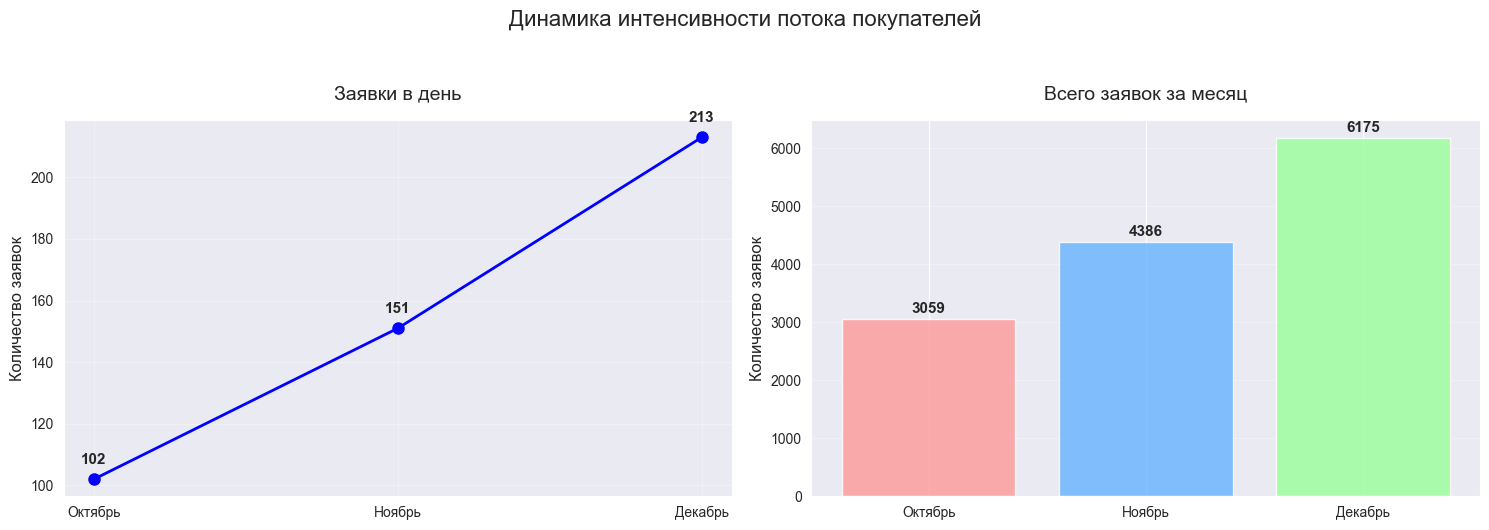

In [26]:
df_intensity = pd.DataFrame({
    'Месяц': ['Октябрь', 'Ноябрь', 'Декабрь'],
    'Заявки_час': [4, 6, 8],
    'Заявки_день': [102, 151, 213],
    'Заявки_месяц': [3059, 4386, 6175]
})

df_intensity.set_index('Месяц', inplace=True)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(df_intensity.index, df_intensity['Заявки_день'], marker='o', linewidth=2, markersize=8, color='blue')
axes[0].set_title('Заявки в день', fontsize=14, pad=15)
axes[0].set_ylabel('Количество заявок', fontsize=12)
axes[0].grid(True, alpha=0.3)
for i, val in enumerate(df_intensity['Заявки_день']):
    axes[0].text(i, val + 5, f'{val}', ha='center', fontsize=11, fontweight='bold')

axes[1].bar(df_intensity.index, df_intensity['Заявки_месяц'], color=['#FF9999', '#66B2FF', '#99FF99'], alpha=0.8)
axes[1].set_title('Всего заявок за месяц', fontsize=14, pad=15)
axes[1].set_ylabel('Количество заявок', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

for i, val in enumerate(df_intensity['Заявки_месяц']):
    axes[1].text(i, val + 100, f'{val}', ha='center', fontsize=11, fontweight='bold')

plt.suptitle('Динамика интенсивности потока покупателей', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


# 7. Какова вероятность того, что клиент вернется за покупками на ВезуМаркет?

## 7.1 Проведем исследование клиенткой базы и фактора лояльности клиента для развития маркетплейса

In [27]:
customer_ret = marketplace_df[['user_id','consultation','cons_duration','basket_amount','month','year']]
customer_ret

,user_id,consultation,cons_duration,basket_amount,month,year
0,5209870,True,13,348,10,2024
1,2540815,False,0,162,10,2024
2,5305770,False,0,8188,10,2024
3,5858087,False,0,11640,10,2024
4,5711053,False,0,2438,10,2024
...,...,...,...,...,...,...
13615,7766167,False,0,1632,12,2024
13616,4061473,False,0,41266,12,2024
13617,3864302,False,0,4760,12,2024
13618,2361461,True,9,324,12,2024


In [28]:
value_counts = customer_ret['user_id'].value_counts()
duplicate_ids = value_counts[value_counts > 1].index
mask_duplicates = customer_ret['user_id'].isin(duplicate_ids)
#-------------------------------------------------------------------------------
unique_users_df = customer_ret[ ~ mask_duplicates ]  # пользователи с 1 записью
duplicate_users_df = customer_ret[ mask_duplicates ]  # пользователи с > 2 записи

In [29]:
value_counts = duplicate_users_df['user_id'].value_counts()
duplicate_ids = value_counts[value_counts > 2].index
mask_duplicates = duplicate_users_df['user_id'].isin(duplicate_ids)
#-------------------------------------------------------------------------------
unique_users_df = duplicate_users_df[ ~ mask_duplicates ]  # пользователи с 1 записью
duplicate_users_df_3 = duplicate_users_df[ mask_duplicates ]  # пользователи с > 3 записи

In [30]:
value_counts = duplicate_users_df['user_id'].value_counts()
duplicate_ids = value_counts[value_counts > 3].index
mask_duplicates = duplicate_users_df['user_id'].isin(duplicate_ids)
#-------------------------------------------------------------------------------
unique_users_df = duplicate_users_df[ ~ mask_duplicates ]  # пользователи с 1 записью
duplicate_users_df_4 = duplicate_users_df[ mask_duplicates ]  # пользователи с > 4 записи

In [31]:
value_counts = duplicate_users_df['user_id'].value_counts()
duplicate_ids = value_counts[value_counts > 4].index
mask_duplicates = duplicate_users_df['user_id'].isin(duplicate_ids)
#-------------------------------------------------------------------------------
unique_users_df = duplicate_users_df[ ~ mask_duplicates ]  # пользователи с 1 записью
duplicate_users_df_5 = duplicate_users_df[ mask_duplicates ]  # пользователи с > 5 записи

In [32]:
value_counts = duplicate_users_df['user_id'].value_counts()
duplicate_ids = value_counts[value_counts > 5].index
mask_duplicates = duplicate_users_df['user_id'].isin(duplicate_ids)
#-------------------------------------------------------------------------------
unique_users_df = duplicate_users_df[ ~ mask_duplicates ]  # пользователи с 1 записью
duplicate_users_df_6 = duplicate_users_df[ mask_duplicates ]  # пользователи с > 6 записи

In [33]:
value_counts = duplicate_users_df['user_id'].value_counts()
duplicate_ids = value_counts[value_counts > 6].index
mask_duplicates = duplicate_users_df['user_id'].isin(duplicate_ids)
#-------------------------------------------------------------------------------
unique_users_df = duplicate_users_df[ ~ mask_duplicates ]  # пользователи с 1 записью
duplicate_users_df_7 = duplicate_users_df[ mask_duplicates ]  # пользователи с > 7 записи

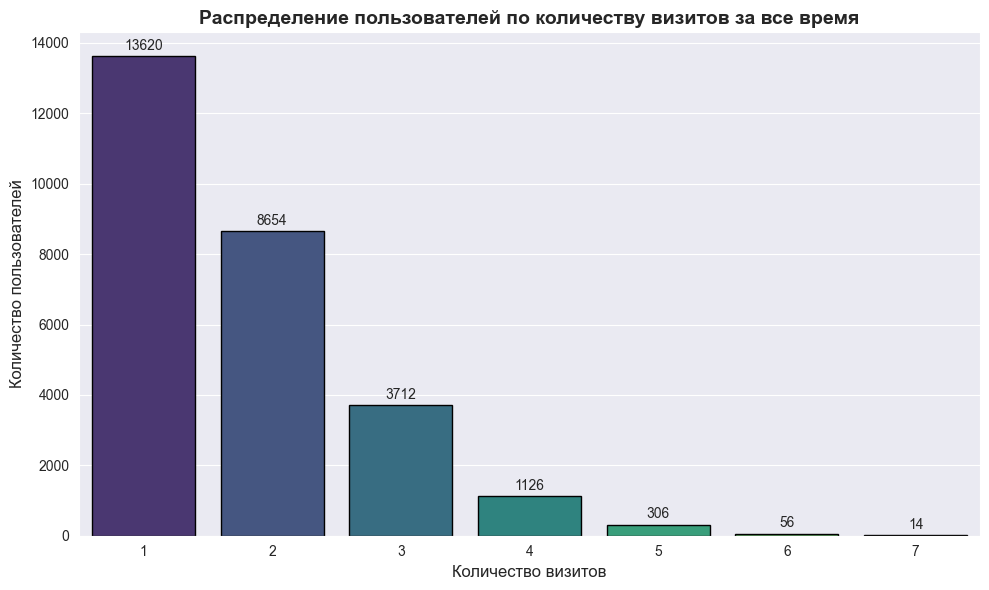

In [34]:
df_visits = pd.DataFrame({
    'Количество_визитов': ['1', '2', '3', '4', '5', '6', '7'],
    'Пользователи': [13620, 8654, 3712, 1126, 306, 56, 14]
})

plt.figure(figsize=(10, 6))
sns.barplot(data=df_visits, x='Количество_визитов', y='Пользователи', hue='Количество_визитов', palette='viridis', edgecolor='black', legend=False)
plt.title('Распределение пользователей по количеству визитов за все время', fontsize=14, fontweight='bold')
plt.xlabel('Количество визитов', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)

for i, value in enumerate(df_visits['Пользователи']):
    plt.text(i, value + 100, f'{value}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [35]:
z = customer_ret['basket_amount'].sum()
a = duplicate_users_df['basket_amount'].sum()
b = duplicate_users_df_3['basket_amount'].sum()
c = duplicate_users_df_4['basket_amount'].sum()
d = duplicate_users_df_5['basket_amount'].sum()
e = duplicate_users_df_6['basket_amount'].sum()
f = duplicate_users_df_7['basket_amount'].sum()

In [36]:
vizit_client = np.array([13620, 8654, 3712, 1126, 306, 56, 14])
summ_basket = np.array([z, a, b, c, d, e, f])
sr_basket = summ_basket / vizit_client

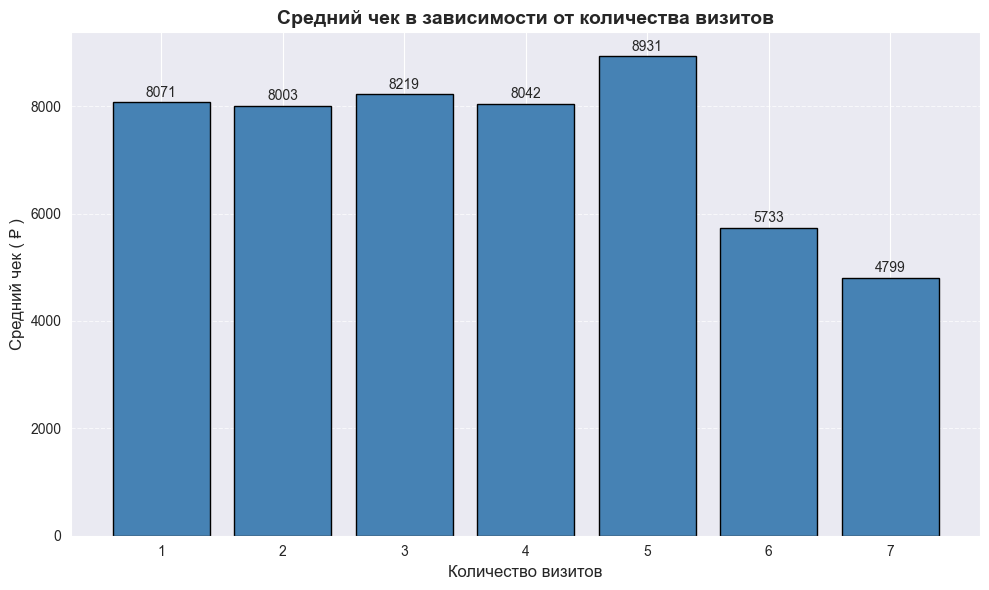

In [81]:
vizit_client = np.array([1, 2, 3, 4, 5, 6, 7])
sn_basket = np.array([8070.58, 8002.77, 8219.30, 8041.64, 8930.52, 5732.68, 4799.29])

plt.figure(figsize=(10, 6))
plt.bar(vizit_client, sn_basket, color='steelblue', edgecolor='black')
plt.xlabel('Количество визитов', fontsize=12)
plt.ylabel('Средний чек ( ₽ )', fontsize=12)
plt.title('Средний чек в зависимости от количества визитов', fontsize=14, fontweight='bold')

for x, y in zip(vizit_client, sn_basket):
    plt.text(x, y + 50, f'{y:.0f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

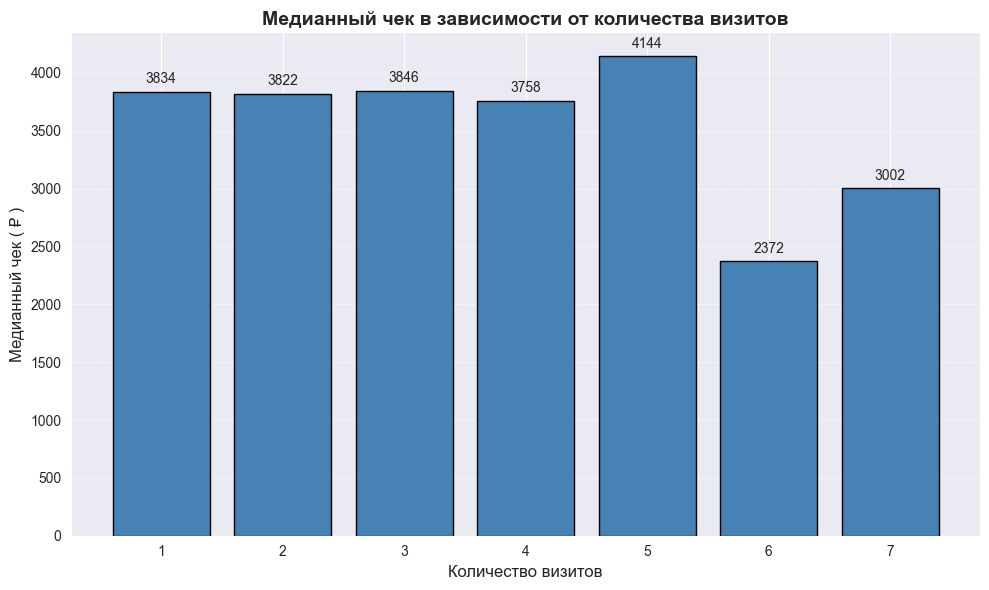

In [80]:
vizit_client = np.array([1, 2, 3, 4, 5, 6, 7])
median_basket = np.array([3834.5, 3821.5, 3845.5, 3757.5, 4143.5, 2371.5, 3001.5])

plt.figure(figsize=(10, 6))
plt.bar(vizit_client, median_basket ,color='steelblue', edgecolor='black')
plt.xlabel('Количество визитов', fontsize=12)
plt.ylabel('Медианный чек ( ₽ )', fontsize=12)
plt.title('Медианный чек в зависимости от количества визитов', fontsize=14, fontweight='bold')

for x, y in zip(vizit_client, median_basket):
    plt.text(x, y + 50, f'{y:.0f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [38]:
z = len(customer_ret['basket_amount'])
a = len(duplicate_users_df['basket_amount'])
b = len(duplicate_users_df_3['basket_amount'])
c = len(duplicate_users_df_4['basket_amount'])
d = len(duplicate_users_df_5['basket_amount'])
e = len(duplicate_users_df_6['basket_amount'])
f = len(duplicate_users_df_7['basket_amount'])

In [39]:
zz = len(customer_ret[customer_ret['consultation'] == True])                ; zzz = len(customer_ret[customer_ret['consultation'] == False])
aa = len(duplicate_users_df[duplicate_users_df['consultation'] == True])    ; aaa = len(duplicate_users_df[duplicate_users_df['consultation'] == False])
bb = len(duplicate_users_df_3[duplicate_users_df_3['consultation'] == True]); bbb = len(duplicate_users_df_3[duplicate_users_df_3['consultation'] == False])
cc = len(duplicate_users_df_4[duplicate_users_df_4['consultation'] == True]); ccc = len(duplicate_users_df_4[duplicate_users_df_4['consultation'] == False])
dd = len(duplicate_users_df_5[duplicate_users_df_5['consultation'] == True]); ddd = len(duplicate_users_df_5[duplicate_users_df_5['consultation'] == False])
ee = len(duplicate_users_df_6[duplicate_users_df_6['consultation'] == True]); eee = len(duplicate_users_df_6[duplicate_users_df_6['consultation'] == False])
ff = len(duplicate_users_df_7[duplicate_users_df_7['consultation'] == True]); fff = len(duplicate_users_df_7[duplicate_users_df_7['consultation'] == False])

In [40]:
true_1 = zz/z*100 ; false_1 = zzz/z*100
true_2 = aa/a*100 ; false_2 = aaa/a*100
true_3 = bb/b*100 ; false_3 = bbb/b*100
true_4 = cc/c*100 ; false_4 = ccc/c*100
true_5 = dd/d*100 ; false_5 = ddd/d*100
true_6 = ee/e*100 ; false_6 = eee/e*100
true_7 = ff/f*100 ; false_7 = fff/f*100

## 7.2 Исследуем фактор консультации в разрезе роста лояльности клиента

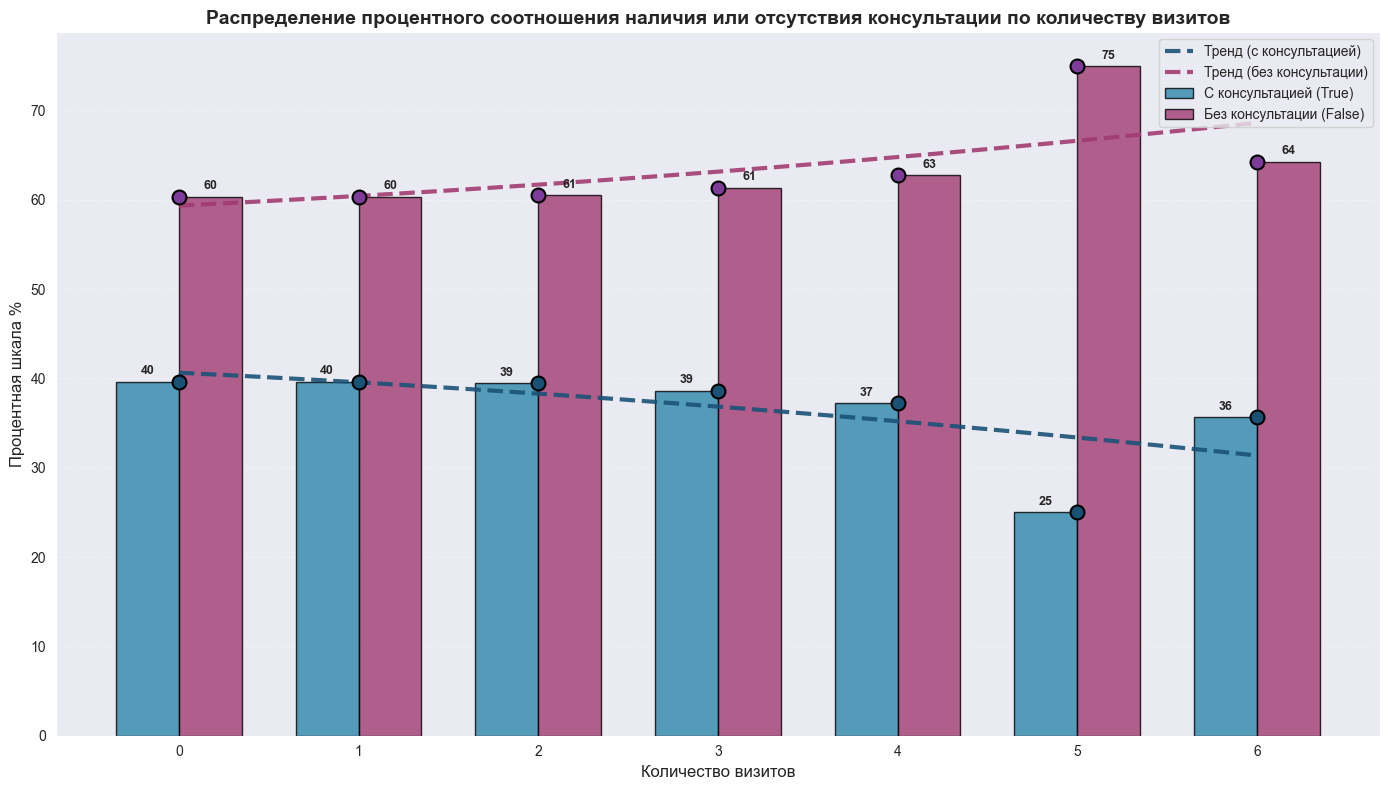

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

visits = [0, 1, 2, 3, 4, 5, 6]
true_users = [true_1, true_2, true_3, true_4, true_5, true_6, true_7]
false_users = [false_1, false_2, false_3, false_4, false_5, false_6, false_7]

fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(visits))
width = 0.35

bars1 = ax.bar(x - width/2, true_users, width, label='С консультацией (True)', color='#2E86AB', edgecolor='black', alpha=0.8)
bars2 = ax.bar(x + width/2, false_users, width, label='Без консультации (False)', color='#A23B72', edgecolor='black', alpha=0.8)

X = np.array(visits).reshape(-1, 1)  # Количество визитов
y_true = np.array(true_users)         # Значения True
y_false = np.array(false_users)       # Значения False

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model_true = LinearRegression()
model_true.fit(X_poly, y_true)
y_true_pred = model_true.predict(X_poly)

model_false = LinearRegression()
model_false.fit(X_poly, y_false)
y_false_pred = model_false.predict(X_poly)

X_smooth = np.linspace(min(visits), max(visits), 100).reshape(-1, 1)
X_smooth_poly = poly.transform(X_smooth)

y_true_smooth = model_true.predict(X_smooth_poly)
y_false_smooth = model_false.predict(X_smooth_poly)

ax.plot(X_smooth, y_true_smooth, color='#1A5276', linewidth=3, linestyle='--',label='Тренд (с консультацией)', alpha=0.9)
ax.plot(X_smooth, y_false_smooth, color='#A23B72', linewidth=3, linestyle='--',label='Тренд (без консультации)', alpha=0.9)

ax.scatter(visits, true_users, color='#1A5276', s=100, zorder=5, edgecolor='black', linewidth=1.5)
ax.scatter(visits, false_users, color='#7D3C98', s=100, zorder=5, edgecolor='black', linewidth=1.5)

ax.set_xlabel('Количество визитов', fontsize=12)
ax.set_ylabel('Процентная шкала %', fontsize=12)
ax.set_title('Распределение процентного соотношения наличия или отсутствия консультации по количеству визитов',
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(visits)
ax.legend(loc='upper right')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{height:.0f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9, fontweight='bold')

add_labels(bars1)
add_labels(bars2)

ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.grid(axis='x', linestyle='--', alpha=0.1)

plt.tight_layout()
plt.show()

## 7.3 Как меняется время консультации в зависимости от визита клиента

In [42]:
z = customer_ret['cons_duration'].sum()
a = duplicate_users_df['cons_duration'].sum()
b = duplicate_users_df_3['cons_duration'].sum()
c = duplicate_users_df_4['cons_duration'].sum()
d = duplicate_users_df_5['cons_duration'].sum()
e = duplicate_users_df_6['cons_duration'].sum()
f = duplicate_users_df_7['cons_duration'].sum()

In [43]:
mean_time_con = z / len(customer_ret)
mean_time_con_2 = a / len(duplicate_users_df)
mean_time_con_3 = b / len(duplicate_users_df_3)
mean_time_con_4 = c / len(duplicate_users_df_4)
mean_time_con_5 = d / len(duplicate_users_df_5)
mean_time_con_6 = e / len(duplicate_users_df_6)
mean_time_con_7 = f / len(duplicate_users_df_7)

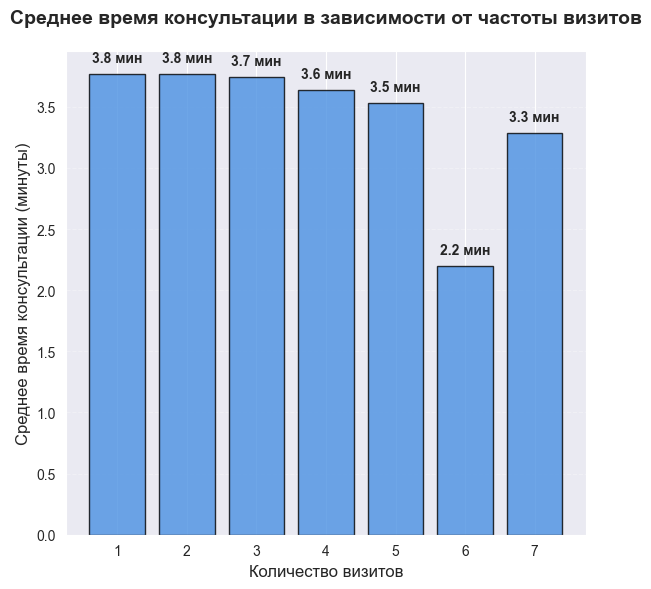

In [44]:
visits = [1, 2, 3, 4, 5, 6, 7]
users_count = [13620, 8654, 3712, 1126, 306, 56, 14]

mean_consultation_times = [
    mean_time_con,
    mean_time_con_2,
    mean_time_con_3,
    mean_time_con_4,
    mean_time_con_5,
    mean_time_con_6,
    mean_time_con_7
]

fig, ax1 = plt.subplots(figsize=(6, 6))

ax1.bar(visits, mean_consultation_times, color='#4A90E2', edgecolor='black', alpha=0.8)

ax1.set_title('Среднее время консультации в зависимости от частоты визитов',fontsize=14, fontweight='bold', pad=20)
ax1.set_ylabel('Среднее время консультации (минуты)', fontsize=12)
ax1.set_xlabel('Количество визитов', fontsize=12)
ax1.set_xticks(visits)
ax1.set_xticklabels(visits)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

for i, (visit, time) in enumerate(zip(visits, mean_consultation_times)):
    ax1.text(visit, time + max(mean_consultation_times)*0.02,
             f'{time:.1f} мин', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 8. Как влияет консультация на продажи маркетплейса ?

## 8.1 Проведем общую оценку влияет ли консультация на продажи маркетплейса

In [45]:
consultation_on = customer_ret[customer_ret['consultation'] == True]
sum_con_true = consultation_on['basket_amount'].sum()
len_con_true = len(consultation_on)

In [46]:
consultation_off = customer_ret[customer_ret['consultation'] == False]
sum_con_false = consultation_off['basket_amount'].sum()
len_con_false = len(consultation_off)

In [59]:
sr_basket_con_true = sum_con_true / len_con_true
sr_basket_con_false = sum_con_false / len_con_false

In [60]:
data = {

    'Показатель': [
        'Сумма продаж',
        'Количество клиентов',
        'Средний чек'
    ],
    'С консультацией': [
        sum_con_true,
        len_con_true,
        sr_basket_con_true
    ],
    'Без консультации': [
        sum_con_false,
        len_con_false,
        sr_basket_con_false
    ]
}

df_comparison = pd.DataFrame(data)
df_comparison

,Показатель,С консультацией,Без консультации
0,Сумма продаж,44177593,65743695
1,Количество клиентов,5399,8221
2,Средний чек,8183,7997


In [61]:
median_basket_con_true = consultation_on['basket_amount'].median()
median_basket_con_false = consultation_off['basket_amount'].median()

In [62]:
data2 = {

    'Показатель': [
        'Сумма продаж',
        'Количество клиентов',
        'Медианный чек'
    ],
    'С консультацией': [
        sum_con_true,
        len_con_true,
        median_basket_con_true
    ],
    'Без консультации': [
        sum_con_false,
        len_con_false,
        median_basket_con_false
    ]
}

df_comparison = pd.DataFrame(data2)
df_comparison

,Показатель,С консультацией,Без консультации
0,Сумма продаж,44177593,65743695
1,Количество клиентов,5399,8221
2,Медианный чек,3835,3834


## 8.2 Проведем исследование CRR накопительно от месяца к месяцу

In [49]:
okt = customer_ret[customer_ret['month'] == 10]
nov = customer_ret[customer_ret['month'] == 11]
dec = customer_ret[customer_ret['month'] == 12]

In [50]:
okt_set = set(okt['user_id'])
nov_set = set(nov['user_id'])
dec_set = set(dec['user_id'])

In [51]:
okt_all  = len(okt)
okt_unic = len(okt['user_id'].unique())
okt_save = (len(okt)) - okt_unic
#---------------------------------------------------
nov_all = len(nov_set)
nov_unic = len(nov_set - okt_set)
nov_save = len(nov_set) - len(nov_set - okt_set)
#---------------------------------------------------
dec_all = len(dec_set)
dec_unic = len(dec_set - nov_set)
dec_save = len(dec_set) - (len(dec_set - nov_set))
#---------------------------------------------------
CRR_okt = (okt_save / okt_all * 100)
CRR_nov = (nov_save / okt_all * 100)
CRR_dec = (dec_save / nov_all * 100)

In [52]:
data = {
    'Месяц':                                        ['Октябрь','Ноябрь','Декабрь'],
    'Всего пользователей' :                         [len(okt),len(nov),len(dec)],
    'Всего уник.пользователей в месяце':            [okt_all, nov_all, dec_all],
    'Уник.новых по отношению к предыдущему месяцу': [f'{okt_unic} виз.кл = 1', nov_unic,dec_unic],
    'Сохраненных с предыдущего месяца':             [(f'{okt_save} виз.кл > 1'), nov_save, dec_save],
    'CRR %' :                                       [CRR_okt,CRR_nov,CRR_dec]
}
df = pd.DataFrame(data)
df

,Месяц,Всего пользователей,Всего уник.пользователей в месяце,Уник.новых по отношению к предыдущему месяцу,Сохраненных с предыдущего месяца,CRR %
0,Октябрь,3059,3059,2733 виз.кл = 1,326 виз.кл > 1,11
1,Ноябрь,4386,3762,2988,774,25
2,Декабрь,6175,4927,3545,1382,37
